## Data 

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../../train_Data.csv')
df = df.iloc[:, 1:]

df = df.drop(["gender"], axis=1)
smoking_map = {'never': 0, 'No Info': 0, 'current': 2, 'former': 1, 'ever': 2, 'not current': 1}
df['smoking_history'] = df['smoking_history'].map(smoking_map)



df_test = pd.read_csv('../../test_Data.csv')
df_test = df_test.iloc[:, 1:]
df_test = df_test.drop(["gender"], axis=1)
smoking_map = {'never': 0, 'No Info': 0, 'current': 2, 'former': 1, 'ever': 2, 'not current': 1}
df_test['smoking_history'] = df_test['smoking_history'].map(smoking_map)

df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,0,25.19,6.6,140,0
1,54.0,0,0,0,27.32,6.6,80,0
2,28.0,0,0,0,27.32,5.7,158,0
3,36.0,0,0,2,23.45,5.0,155,0
4,76.0,1,1,2,20.14,4.8,155,0


## Correlation heat map

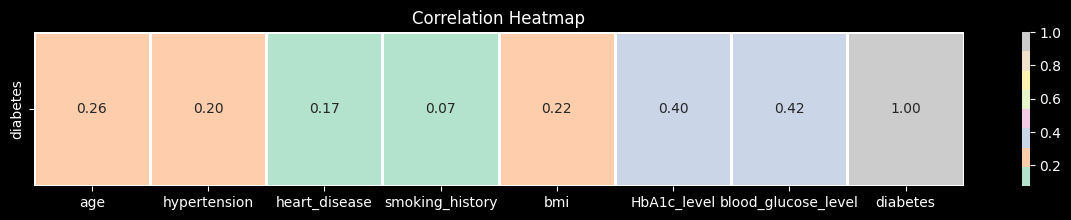

In [141]:
features_corr_to_diabetes = df.corr().loc[["diabetes"]]

plt.figure(figsize=(15, 2))
sns.heatmap(features_corr_to_diabetes, annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.xticks(rotation=0, ha='center')

plt.title('Correlation Heatmap')
plt.show()


## Model

In [147]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


scaler = StandardScaler()
x_train = df.iloc[:, :-1] # selects features cols
y_train = df.iloc[:, -1] # selects diabetes col 
x_train = scaler.fit_transform(x_train)

x_test = df_test.iloc[:, :-1]
x_test = scaler.transform(x_test)
y_test = df_test.iloc[:, -1]

model = SGDClassifier(
        loss="log_loss",
        learning_rate="constant",
        eta0=0.0001,
        max_iter=200,
        tol=None,
        random_state=0,
    )

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

f1 = f1_score(y_test, y_predict)

print(f"F1 Score: {f1:.4f}")


F1 Score: 0.7216


## Confusion Matrix

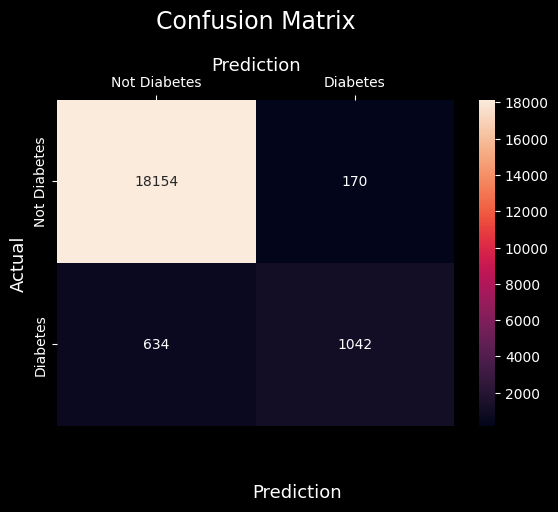

In [148]:
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Not Diabetes','Diabetes'],
            yticklabels=['Not Diabetes','Diabetes'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top') 
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.gca().figure.text(0.5, 0.05, 'Prediction', ha='center', fontsize=13)
plt.show()